<a href="https://colab.research.google.com/github/vibhananda28/Machine-Learning-Projects/blob/main/Project2_VibhaNanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from more_itertools import take
import csv
import copy
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from statistics import mean
from matplotlib import pyplot
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score

In [ ]:
#Read the training dataset
df_train = pd.read_csv("./Data/training.csv")

In [ ]:
df_train.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [ ]:
#Read the testing dataset
df_test = pd.read_csv("./Data/testing.csv")

In [ ]:
df_test.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


### EDA

In [ ]:
print(df_train.shape)
print(df_test.shape)

(168, 148)
(507, 148)


It can be noted that the testing dataset is almost 3 times the testing dataset. Both have 148 features.

In [ ]:
print(df_train['class'].nunique())
print(df_test['class'].nunique())

9
9


In [ ]:
df_train['class'].value_counts()

grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: class, dtype: int64

In [ ]:
df_test['class'].value_counts()

building     97
concrete     93
tree         89
grass        83
shadow       45
asphalt      45
car          21
soil         20
pool         14
Name: class, dtype: int64

The target variable has 9 unique values, i.e. multi class variable. They are also not distributed evenly, hence we have imbalanced data.

In [ ]:
pd.set_option('display.max_colwidth', None)
df_train.dtypes

class             object
BrdIndx          float64
Area               int64
Round            float64
Bright           float64
                  ...   
Dens_140         float64
Assym_140        float64
NDVI_140         float64
BordLngth_140      int64
GLCM3_140        float64
Length: 148, dtype: object

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.4+ KB


In [ ]:
df_train.isnull().values.any()

False

In [ ]:
corr = df_train.corr()

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

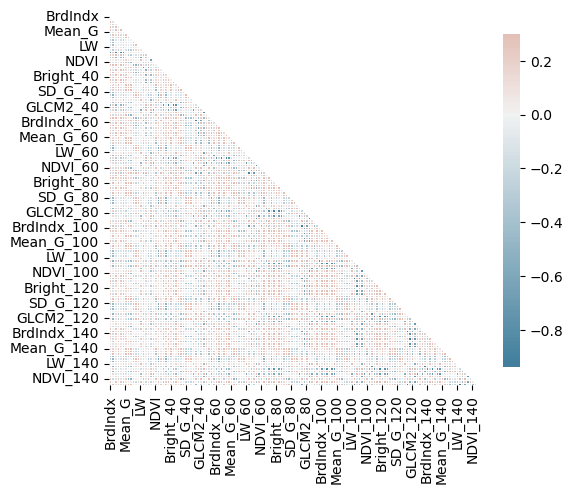

In [ ]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})

Since it is hard to tell if the features are correlated due to the size of the dataset, we will perform other forms of feature selection.

After some basic exploratory data analysis, it is noticeable that the testing data (507 rows, 148cols) frame is 3 times larger than the training dataframe (168 rows, 148cols). There were no missing values and all features were numerical. It is also noted that the target variable- class is imbalanced.

### FEATURE SELECTION

##### Random Forest Feature Importance for Feature Selection

We will try both random forest feature importance and ANOVA approach for feature selection.
Random Forest feature importance helps select features with non-linear importances also since it used Gini impurity to filter the most impure nodes. We will test for the best threshold of feature importances and then perform feature selection for classification based on their relative importance.
ANOVA helps in removing low variance features and is useful in multilabel classifications.

In [ ]:
y=df_train["class"]

In [ ]:
X=df_train.drop('class', axis=1)

In [ ]:
model= RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [ ]:
importances=model.feature_importances_

In [ ]:
final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances":importances})
final_df.set_index("Importances")

,Features
Importances,
0.005361,BrdIndx
0.013040,Area
0.002423,Round
0.015065,Bright
0.010640,Compact
...,...
0.001469,Dens_140
0.002639,Assym_140
0.016678,NDVI_140


In [ ]:
final_df = final_df.sort_values("Importances")

<AxesSubplot:>

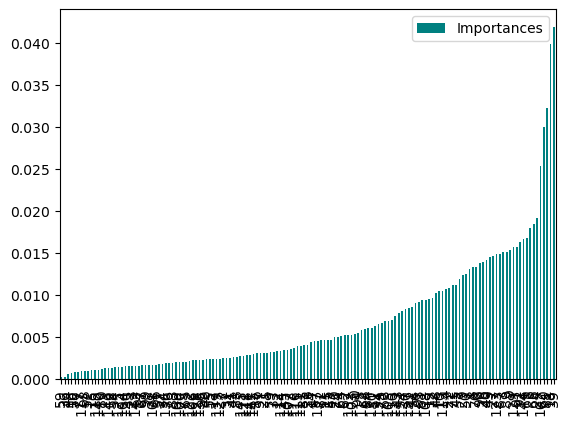

In [ ]:
final_df.plot.bar(color="teal")

We can use the threshold of 0.008 to select features.

In [ ]:
selector = SelectFromModel(model, threshold=0.01)
features_important = selector.fit_transform(X, y)

print("Old shape:", X.shape)
print("New shape:", features_important.shape)

Old shape: (168, 147)
New shape: (168, 36)


In [ ]:
model.fit(features_important, y)

RandomForestClassifier(random_state=42)

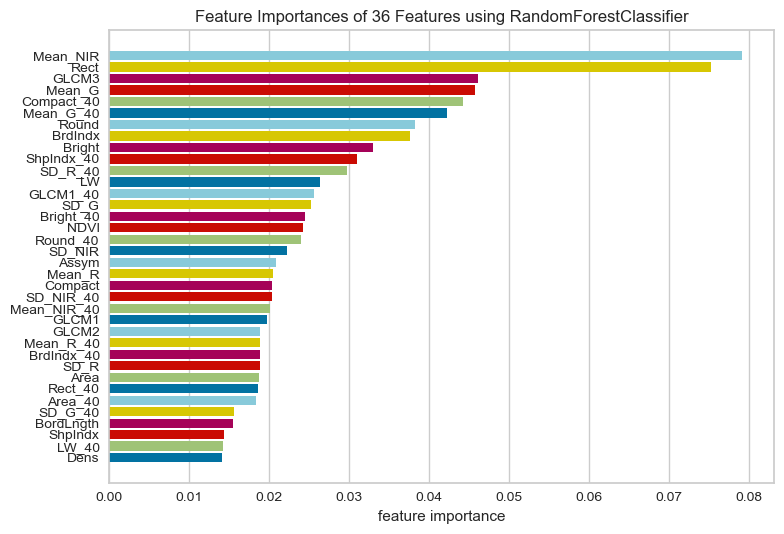

<AxesSubplot:title={'center':'Feature Importances of 36 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

FeatureImportances(model, relative=False).fit(X, y).show()

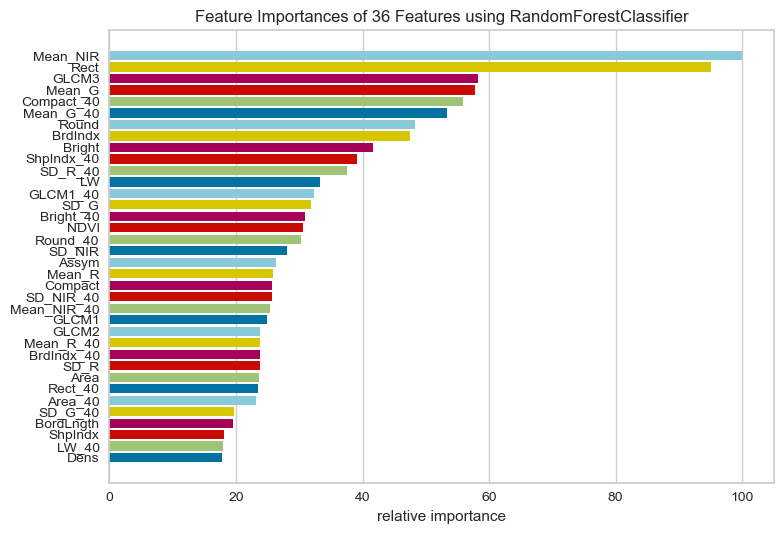

<AxesSubplot:title={'center':'Feature Importances of 36 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [ ]:
FeatureImportances(model, relative=True).fit(X, y).show()

In [ ]:
selected_features = selector.get_support()

In [ ]:
selected_feature_cols = X.columns[selected_features]

In [ ]:
print(selected_feature_cols)

Index(['Area', 'Bright', 'Compact', 'Mean_G', 'Mean_R', 'Mean_NIR', 'SD_G',
       'SD_R', 'NDVI', 'Area_40', 'Bright_40', 'Mean_G_40', 'Mean_R_40',
       'Mean_NIR_40', 'NDVI_40', 'BordLngth_40', 'Bright_60', 'Mean_G_60',
       'Mean_R_60', 'Mean_NIR_60', 'NDVI_60', 'Bright_80', 'Mean_G_80',
       'Mean_R_80', 'Mean_NIR_80', 'NDVI_80', 'Bright_100', 'ShpIndx_100',
       'Mean_G_100', 'Mean_R_100', 'Mean_NIR_100', 'NDVI_100', 'Mean_NIR_120',
       'NDVI_120', 'Bright_140', 'NDVI_140'],
      dtype='object')


In [ ]:
features_selected = ['class'] + list(selected_feature_cols)

In [ ]:
df_train_final = df_train[features_selected]

In [ ]:
df_train_final.head()

,class,Area,Bright,Compact,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,NDVI,...,Bright_100,ShpIndx_100,Mean_G_100,Mean_R_100,Mean_NIR_100,NDVI_100,Mean_NIR_120,NDVI_120,Bright_140,NDVI_140
0,car,91,231.38,1.39,207.92,241.74,244.48,21.41,20.40,-0.08,...,227.19,1.42,203.95,237.23,240.38,-0.08,240.38,-0.08,227.19,-0.08
1,concrete,241,216.15,2.46,187.85,229.39,231.20,6.57,6.97,-0.10,...,205.53,5.12,178.89,217.71,220.01,-0.10,225.68,-0.09,211.94,-0.09
2,concrete,266,232.18,2.07,206.54,244.22,245.79,6.16,4.93,-0.08,...,222.97,2.08,201.51,232.96,234.43,-0.07,234.43,-0.07,222.97,-0.07
3,concrete,399,230.40,2.49,204.60,243.27,243.32,5.76,5.56,-0.09,...,232.09,4.19,205.48,245.53,245.26,-0.09,239.83,-0.09,226.65,-0.09
4,concrete,944,193.18,2.28,165.98,205.55,208.00,11.46,8.90,-0.11,...,196.33,6.57,180.56,203.81,204.62,-0.06,204.91,-0.08,193.39,-0.08


In [ ]:
df_test_final = df_test[features_selected]

In [ ]:
df_test_final.head()

,class,Area,Bright,Compact,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,NDVI,...,Bright_100,ShpIndx_100,Mean_G_100,Mean_R_100,Mean_NIR_100,NDVI_100,Mean_NIR_120,NDVI_120,Bright_140,NDVI_140
0,concrete,131,222.74,1.66,192.94,235.11,240.15,11.24,11.47,-0.10,...,181.04,3.69,155.76,192.34,195.03,-0.11,204.28,-0.10,185.14,-0.10
1,shadow,864,47.56,1.41,36.82,48.78,57.09,8.15,8.02,-0.14,...,49.82,1.32,38.88,51.21,59.38,-0.14,59.38,-0.14,49.82,-0.14
2,shadow,409,51.38,1.37,41.72,51.96,60.48,8.11,9.20,-0.11,...,46.57,2.79,40.01,46.34,53.36,-0.07,53.36,-0.07,55.06,0.10
3,tree,187,70.08,3.41,93.13,55.20,61.92,28.60,15.88,0.26,...,69.80,3.22,86.22,58.03,65.15,0.20,65.15,0.20,69.80,0.20
4,asphalt,116,89.57,3.06,73.17,94.89,100.64,5.41,5.20,-0.13,...,96.24,2.56,82.84,100.31,105.55,-0.10,105.55,-0.10,96.24,-0.10


##### ANOVA for Feature Selection (Removing low variance features)

In [ ]:
threshold = .8 * (1 - .8)
# threshold = 0

In [ ]:
sel = VarianceThreshold(threshold)
X_new = sel.fit_transform(X)

In [ ]:
selected_feature_names = X.columns[sel.get_support()]

In [ ]:
# Univariate Feature Selection
sel = SelectKBest(f_classif, k=50)
X_new_2 = sel.fit_transform(X_new, y)

In [ ]:
selected_feature_names_final = selected_feature_names[sel.get_support()]

In [ ]:
df_train_final_anova = df_train[selected_feature_names_final]

In [ ]:
df_train_final_anova["class"] = df_train["class"]

In [ ]:
df_train_final_anova.head()

,Area,Bright,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,Bright_40,Mean_G_40,Mean_R_40,...,SD_R_120,SD_NIR_120,Bright_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,class
0,91,231.38,207.92,241.74,244.48,21.41,20.40,227.19,203.95,237.23,...,28.36,26.18,227.19,203.95,237.23,240.38,27.63,28.36,26.18,car
1,241,216.15,187.85,229.39,231.20,6.57,6.97,209.44,181.91,222.46,...,22.92,22.29,211.94,186.31,223.83,225.68,22.62,22.92,22.29,concrete
2,266,232.18,206.54,244.22,245.79,6.16,4.93,232.50,208.36,244.07,...,15.93,15.59,222.97,201.51,232.96,234.43,15.35,15.93,15.59,concrete
3,399,230.40,204.60,243.27,243.32,5.76,5.56,231.57,204.77,245.17,...,13.75,13.51,226.65,200.18,239.93,239.83,13.69,13.75,13.51,concrete
4,944,193.18,165.98,205.55,208.00,11.46,8.90,193.18,165.98,205.55,...,14.93,15.65,193.39,172.13,203.14,204.91,17.38,14.93,15.65,concrete


In [ ]:
df_test_final_anova = df_test[selected_feature_names_final]

In [ ]:
df_test_final_anova["class"] = df_test["class"]

In [ ]:
df_train_final_anova["class"].nunique()

9

In [ ]:
df_train_final_anova.columns

Index(['Area', 'Bright', 'Mean_G', 'Mean_R', 'Mean_NIR', 'SD_G', 'SD_R',
       'Bright_40', 'Mean_G_40', 'Mean_R_40', 'Mean_NIR_40', 'SD_R_40',
       'SD_NIR_40', 'GLCM3_40', 'Bright_60', 'Mean_G_60', 'Mean_R_60',
       'Mean_NIR_60', 'SD_G_60', 'SD_R_60', 'SD_NIR_60', 'BordLngth_60',
       'Bright_80', 'Mean_G_80', 'Mean_R_80', 'Mean_NIR_80', 'SD_G_80',
       'SD_R_80', 'SD_NIR_80', 'Bright_100', 'Mean_G_100', 'Mean_R_100',
       'Mean_NIR_100', 'SD_G_100', 'SD_R_100', 'SD_NIR_100', 'Bright_120',
       'Mean_G_120', 'Mean_R_120', 'Mean_NIR_120', 'SD_G_120', 'SD_R_120',
       'SD_NIR_120', 'Bright_140', 'Mean_G_140', 'Mean_R_140', 'Mean_NIR_140',
       'SD_G_140', 'SD_R_140', 'SD_NIR_140', 'class'],
      dtype='object')

### CLASSIFICATION - RANDOM FOREST CLASSIFIER

Random Forest is a good choice as it is easy to tune and works well even if there are lots of missing data and more noise. Overfitting will not happen easily.

##### WITH RANDOM FOREST FEATURE IMPORTANCE BASED FEATURES

In [ ]:
X_train = df_train_final.drop('class', axis=1)
X_test = df_test_final.drop('class', axis=1)

In [ ]:
y_train=df_train_final["class"]
y_test=df_test_final["class"]

In [ ]:
X_1 = pd.concat([X_train, X_test], axis=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_1.shape)

(168, 36)
(507, 36)
(675, 36)


In [ ]:
y_1 = pd.concat([y_train, y_test], axis=0)

In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_1.shape)

(168,)
(507,)
(675,)


In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

In [ ]:
for train_index, test_index in skf.split(X_1,y_1):
    X_train_fold, X_val_fold = X_1.iloc[train_index], X_1.iloc[test_index]
    y_train_fold, y_val_fold = y_1.iloc[train_index], y_1.iloc[test_index]

In [ ]:
X_train_fold.shape

(450, 36)

In [ ]:
X_val_fold.shape

(225, 36)

In [ ]:
y_val_fold.nunique()

9

In [ ]:
rf_classifier.fit(X_train_fold, y_train_fold)

RandomForestClassifier()

In [ ]:
y_pred_fold = rf_classifier.predict(X_val_fold)

In [ ]:
cm = confusion_matrix(y_val_fold, y_pred_fold)

In [ ]:
labels = np.unique(y_train)

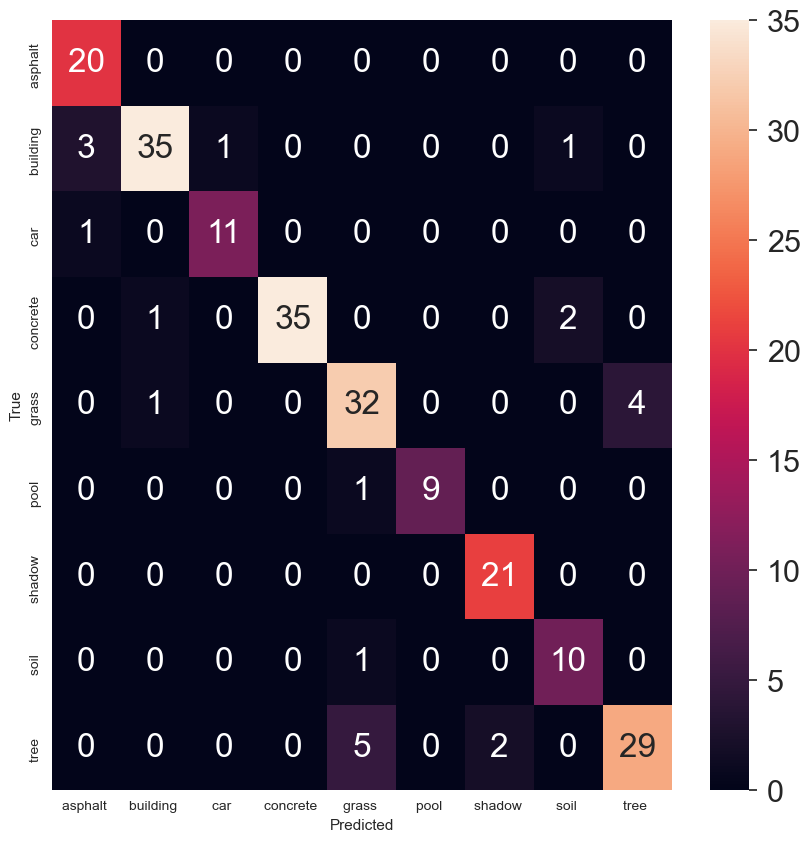

In [ ]:
# Plot confusion matrix with class labels
plt.subplots(figsize=(10, 10))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### METRICS

In [ ]:
balanced_accuracy_score(y_val_fold, y_pred_fold)

0.9102478475285493

In [ ]:
cohen_kappa_score(y_val_fold, y_pred_fold)

0.8819678861417755

##### WITH ANOVA BASED FEATURES

In [ ]:
X_train_av = df_train_final_anova.drop('class', axis=1)
X_test_av = df_test_final_anova.drop('class', axis=1)

In [ ]:
y_train_av = df_train_final_anova["class"]
y_test_av = df_test_final_anova["class"]

In [ ]:
X_2 = pd.concat([X_train_av, X_test_av], axis=0)

In [ ]:
print(X_train_av.shape)
print(X_test_av.shape)
print(X_2.shape)

(168, 50)
(507, 50)
(675, 50)


In [ ]:
y_2 = pd.concat([y_train_av, y_test_av], axis=0)

In [ ]:
print(y_train_av.shape)
print(y_test_av.shape)
print(y_2.shape)

(168,)
(507,)
(675,)


In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

In [ ]:
for train_index, test_index in skf.split(X_2, y_2):
    X_train_fold, X_val_fold = X_2.iloc[train_index], X_2.iloc[test_index]
    y_train_fold, y_val_fold = y_2.iloc[train_index], y_2.iloc[test_index]

In [ ]:
rf_classifier.fit(X_train_fold, y_train_fold)

RandomForestClassifier()

In [ ]:
y_pred_fold = rf_classifier.predict(X_val_fold)

In [ ]:
cm_av = confusion_matrix(y_val_fold, y_pred_fold)

In [ ]:
labels = np.unique(y_train_av)

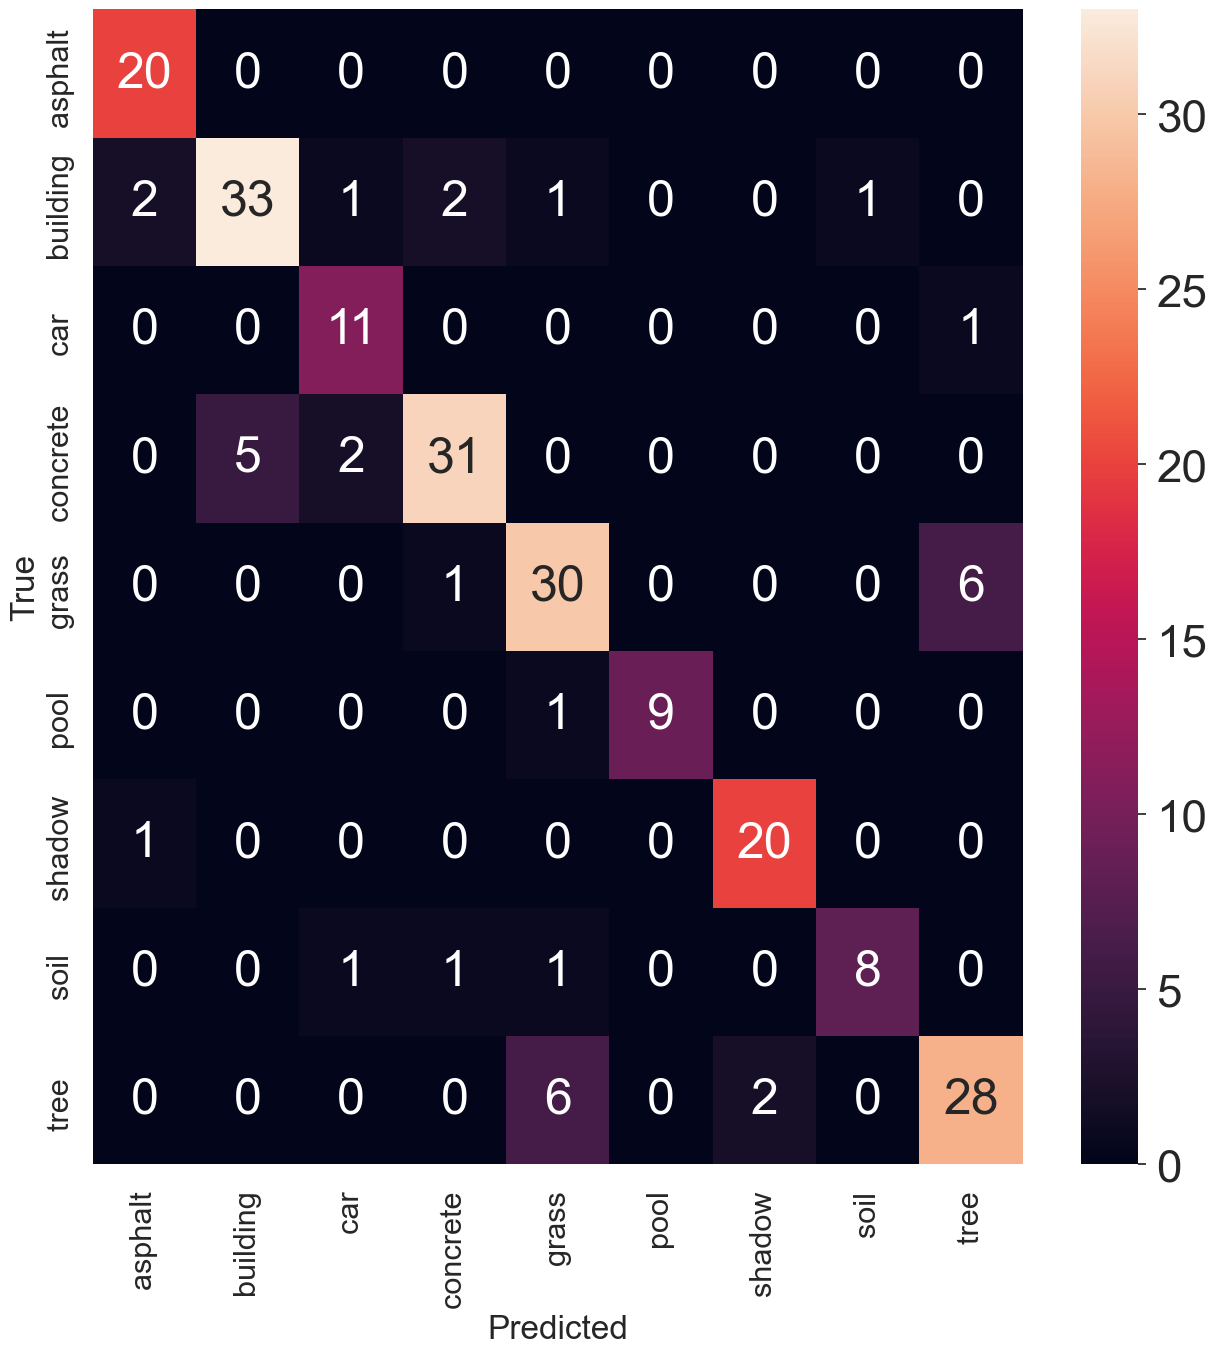

In [ ]:
# Plot confusion matrix with class labels
plt.subplots(figsize=(15, 15))
sns.set(font_scale=3)
sns.heatmap(cm_av, annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### METRICS

In [ ]:
balanced_accuracy_score(y_val_fold, y_pred_fold)

0.8584109342881273

In [ ]:
cohen_kappa_score(y_val_fold, y_pred_fold)

0.820127452547909

We also see from the confusion matrix that the misclassifications are pretty low. We do note that tree vs grass and concrete vs building are the most notable misclassifications. However, it is possible that the stratified k fold could have led to smaller samples being selected as the instances are lower compared to other models.

Balanced Accuracy: Using anova features improves the score by 3-4%.
Cohen's Kappa: Using anova features improves the score by 3%.